# Question to answer:
4. What is the coorelation between number of police station and number of crimes/offence status?
5. What is the trend for number of police status built over time, by regions

# Glossary
#### Charge status ####
The charge status indicates when a charge has been laid by Victoria Police at the time these data were extracted from the LEAP database. CSA output categories for this variable include:

Charges Laid,
No Charges Laid,
Unsolved

In the event that no charges have been recorded the investigation status determines whether the incident is categorised as ‘unsolved’ or ‘no charges laid’. The ‘no charges laid’ category represents all investigation statuses other than ‘unsolved’. Both charge and investigation statuses represent information at a point in time and are subject to change.

#### Investigation status:
indicates how the offences has been dealt with by Victoria Police at the time data was extracted from the LEAP database. This status represents information at a point in time and is subject to change.
CSA output categories include:

Arrest/Summons
Caution/Official warning
Intent to Summons
Other
Unsolved
Other includes: Penalty infringement notice, caution not authorised, complaint withdrawn, notice to appear, no offence disclosed, not authorised, offender processed, warrant issued, summons not authorised, presentment and other statuses.

For more information, please refer to Charge status

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import requests
import json
import numpy as np
from scipy.stats import linregress
import time

In [2]:
xlsx = pd.ExcelFile("./Data/Data_Tables_LGA_Criminal_Incidents_Year_Ending_September_2021.xlsx")

In [3]:
table2 = pd.read_excel(xlsx, "Table 02")
table2

,Year,Year ending,Police Service Area,Local Government Area,Offence Division,Offence Subdivision,Offence Subgroup,Incidents Recorded,"PSA Rate per 100,000 population","LGA Rate per 100,000 population"
0,2021,September,Ballarat,Ballarat,A Crimes against the person,A10 Homicide and related offences,A10 Homicide and related offences,4,3.308169,3.528871
1,2021,September,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A211 FV Serious assault,140,115.785923,123.510499
2,2021,September,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A212 Non-FV Serious assault,139,114.958881,122.628281
3,2021,September,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,"A22 Assault police, emergency services or othe...",42,34.735777,37.053150
4,2021,September,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A231 FV Common assault,257,212.549873,226.729987
...,...,...,...,...,...,...,...,...,...,...
50400,2012,September,Yarra Ranges,Yarra Ranges,F Other offences,F20 Transport regulation offences,F29 Other transport regulation offences,9,6.005445,6.005445
50401,2012,September,Yarra Ranges,Yarra Ranges,F Other offences,F30 Other government regulatory offences,F33 Liquor and tobacco licensing offences,6,4.003630,4.003630
50402,2012,September,Yarra Ranges,Yarra Ranges,F Other offences,F30 Other government regulatory offences,F39 Other government regulatory offences,7,4.670902,4.670902
50403,2012,September,Yarra Ranges,Yarra Ranges,F Other offences,F90 Miscellaneous offences,F91 Environmental offences,2,1.334543,1.334543


In [4]:
# creating a new column 
table2["Total Population"] = (table2["Incidents Recorded"] / table2["LGA Rate per 100,000 population"] * 100000).astype(int)
table2

,Year,Year ending,Police Service Area,Local Government Area,Offence Division,Offence Subdivision,Offence Subgroup,Incidents Recorded,"PSA Rate per 100,000 population","LGA Rate per 100,000 population",Total Population
0,2021,September,Ballarat,Ballarat,A Crimes against the person,A10 Homicide and related offences,A10 Homicide and related offences,4,3.308169,3.528871,113350
1,2021,September,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A211 FV Serious assault,140,115.785923,123.510499,113350
2,2021,September,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A212 Non-FV Serious assault,139,114.958881,122.628281,113350
3,2021,September,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,"A22 Assault police, emergency services or othe...",42,34.735777,37.053150,113350
4,2021,September,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A231 FV Common assault,257,212.549873,226.729987,113350
...,...,...,...,...,...,...,...,...,...,...,...
50400,2012,September,Yarra Ranges,Yarra Ranges,F Other offences,F20 Transport regulation offences,F29 Other transport regulation offences,9,6.005445,6.005445,149863
50401,2012,September,Yarra Ranges,Yarra Ranges,F Other offences,F30 Other government regulatory offences,F33 Liquor and tobacco licensing offences,6,4.003630,4.003630,149863
50402,2012,September,Yarra Ranges,Yarra Ranges,F Other offences,F30 Other government regulatory offences,F39 Other government regulatory offences,7,4.670902,4.670902,149864
50403,2012,September,Yarra Ranges,Yarra Ranges,F Other offences,F90 Miscellaneous offences,F91 Environmental offences,2,1.334543,1.334543,149864


In [5]:
population_gb = table2.groupby(["Year","Local Government Area"])

In [6]:
population_df = pd.DataFrame({"Total Population": population_gb["Total Population"].mean().astype(int) })

In [7]:
population_df.reset_index()

,Year,Local Government Area,Total Population
0,2012,Alpine,12182
1,2012,Ararat,11399
2,2012,Ballarat,96727
3,2012,Banyule,123583
4,2012,Bass Coast,30811
...,...,...,...
785,2021,Wodonga,43147
786,2021,Wyndham,290654
787,2021,Yarra,100852
788,2021,Yarra Ranges,159102


In [8]:
population_df.to_csv("./output_data/Population_by_LGA_2012-2021.csv")

In [9]:
# merge two dataframes
table5 = pd.read_excel(xlsx, "Table 05")
charge_status_df = pd.merge(population_df, table5 , how = "right", on = ["Year", "Local Government Area"])
charge_status_df

,Year,Local Government Area,Total Population,Year ending,Charge Status,Incidents Recorded
0,2021,Alpine,13098,September,Charges laid,153
1,2021,Alpine,13098,September,No charges laid,111
2,2021,Alpine,13098,September,Unsolved,107
3,2021,Ararat,12004,September,Charges laid,625
4,2021,Ararat,12004,September,No charges laid,250
...,...,...,...,...,...,...
2365,2012,Yarra Ranges,149863,September,No charges laid,841
2366,2012,Yarra Ranges,149863,September,Unsolved,2677
2367,2012,Yarriambiack,7094,September,Charges laid,125
2368,2012,Yarriambiack,7094,September,No charges laid,69


In [13]:
# setting up function to show scatter plot by year
def scatter_plot(df, year, chargetype):
    new_df = df.loc[(df["Charge Status"] == chargetype) & (df["Year"] == year)]
    title = str(f"Total Population vs {chargetype} - {year}")
    new_df.plot("Incidents Recorded", "Total Population", kind = "scatter", xlabel = chargetype, title = title)
                
    (slope, intercept, rvalue, pvalue, stderr) = linregress(new_df["Incidents Recorded"],new_df["Total Population"])
    equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
    x = np.arange(0,new_df["Incidents Recorded"].max(),100)
    y = [slope * x1 + intercept for x1 in x]
    plt.annotate(equation, (new_df["Incidents Recorded"].max()/4*2 , new_df["Total Population"].max()/3), color = "red")
                
    plt.style.use("Solarize_Light2")
    plt.plot(x, y, color = "red" )
    print(f"r-value is {rvalue}")

r-value is 0.8229060035486371


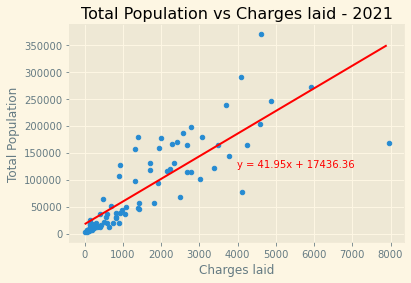

In [16]:
scatter_plot(charge_status_df, 2021, "Charges laid")

r-value is 0.7696958727213883


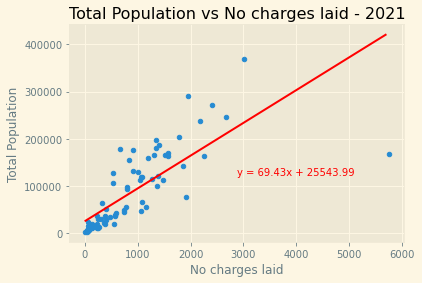

In [15]:
scatter_plot(charge_status_df, 2021, "No charges laid")

r-value is 0.8649090613317708


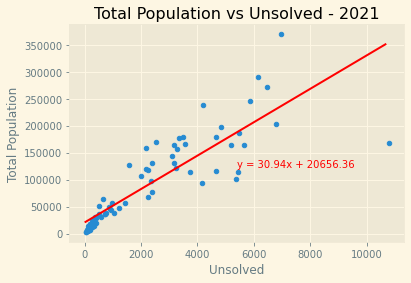

In [17]:
scatter_plot(charge_status_df, 2021, "Unsolved")

# getting LGA boundaries
url = "https://data.gov.au/geoserver/vic-local-government-areas-psma-administrative-boundaries/wfs?request=GetFeature&typeName=ckan_bdf92691_c6fe_42b9_a0e2_a4cd716fa811&outputFormat=json"
response = requests.get(url).json()


response["features"][0]["properties"]

response["features"][0]["geometry"]["type"]

# list of LGA
for lga in response["features"]:
    # vic_lga__3 : short name
    print(lga["geometry"]["type"])

list of LGA
for lga in response["features"]:
    # vic_lga__3 : short name
    print(lga["properties"]["vic_lga__3"])